## Copied from ALMA docs website on how to query via scientific category

In [1]:
import numpy as np
from astropy.table import Table
import pyvo
import sys
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.cluster

service = pyvo.dal.TAPService("https://almascience.nrao.edu/tap")   # for the NA ALMA TAP service

In [3]:
def query_scientific_category(service, scientific_category):
    """Query for all science observations of a given scientific category. To reduce the memory
       requirements, rather than using *, it is often useful to select the columns of interest.
    
       service               pyvo TAPService instance
       scientific_category   one of the categories shown at the top of this notebook
       
       returns               pandas table    
    """
    
    query = f"""  
            SELECT target_name, science_keyword, s_ra, s_dec, band_list
            FROM ivoa.obscore  
            WHERE scientific_category = '{scientific_category}'  
            AND science_observation = 'T'  
            GROUP BY target_name, science_keyword, s_ra, s_dec, band_list
            """

    return service.search(query).to_table().to_pandas()

def query_science_keyword(service, science_keyword):
    """ALMA has a long list of scientific keywords in the Observing Tool from whch PIs need to select
        one or two in their proposals. This query returns all science observations for a given science 
        keyword (or part of it).
        
        service               pyvo TAPService instance
        science_keyword       one of the science keywords of ALMA or a substring
        
        returns               pandas table       
        """

    query = f"""  
            SELECT s_ra, s_dec, target_name, band_list, t_exptime
            FROM ivoa.obscore  
            WHERE science_observation = 'T'  
            AND science_keyword like '%{science_keyword}%'  
            GROUP BY s_ra, s_dec, target_name, band_list, t_exptime
            """

    return service.search(query).to_table().to_pandas()


def query_science_keyword_datatype(service, science_keyword, datatype):
    """This function shows how to combine several constraints. Here the science keyword as well 
       as the datatype and science_observations
    
       service               pyvo TAPService instance
       science_keyword       one of the science keywords of ALMA or a substring
       datatype              "image" or "cube"
       
       returns               pandas table    
    """
    
    query = f"""   
            SELECT s_ra, s_dec, target_name, band_list, t_exptime
            FROM ivoa.obscore  
            WHERE science_keyword like '%{science_keyword}%'  
            AND science_observation = 'T'  
            AND dataproduct_type = '{datatype}'   
            GROUP BY s_ra, s_dec, target_name, band_list, t_exptime
            """
    
    return service.search(query).to_table().to_pandas()

## Test: How many quasars observed with ALMA?

In [ ]:
# output_qsos_cube = query_science_keyword_datatype(service, 'Quasars', 'cube' )
# output_qsos_image = query_science_keyword_datatype(service, 'Quasars', 'image' )
# print(f"There are {len(np.unique(output_qsos_cube['target_name']))} line observations (cube) and {len(np.unique(output_qsos_image['target_name']))} continuum observations (line) in the ALMA database.")

There are 1418 line observations (cube) and 2957 continuum observations (line) in the ALMA database.


In [6]:
output_dd_cube = query_science_keyword_datatype(service, 'Debris disks', 'cube' )
output_dd_image = query_science_keyword_datatype(service, 'Debris disks', 'image' )
print(f"There are {len(np.unique(output_dd_cube['target_name']))} line observations (cube) and {len(np.unique(output_dd_image['target_name']))} continuum observations (line) in the ALMA database.")

There are 983 line observations (cube) and 779 continuum observations (line) in the ALMA database.


Text(0, 0.5, 'Dec')

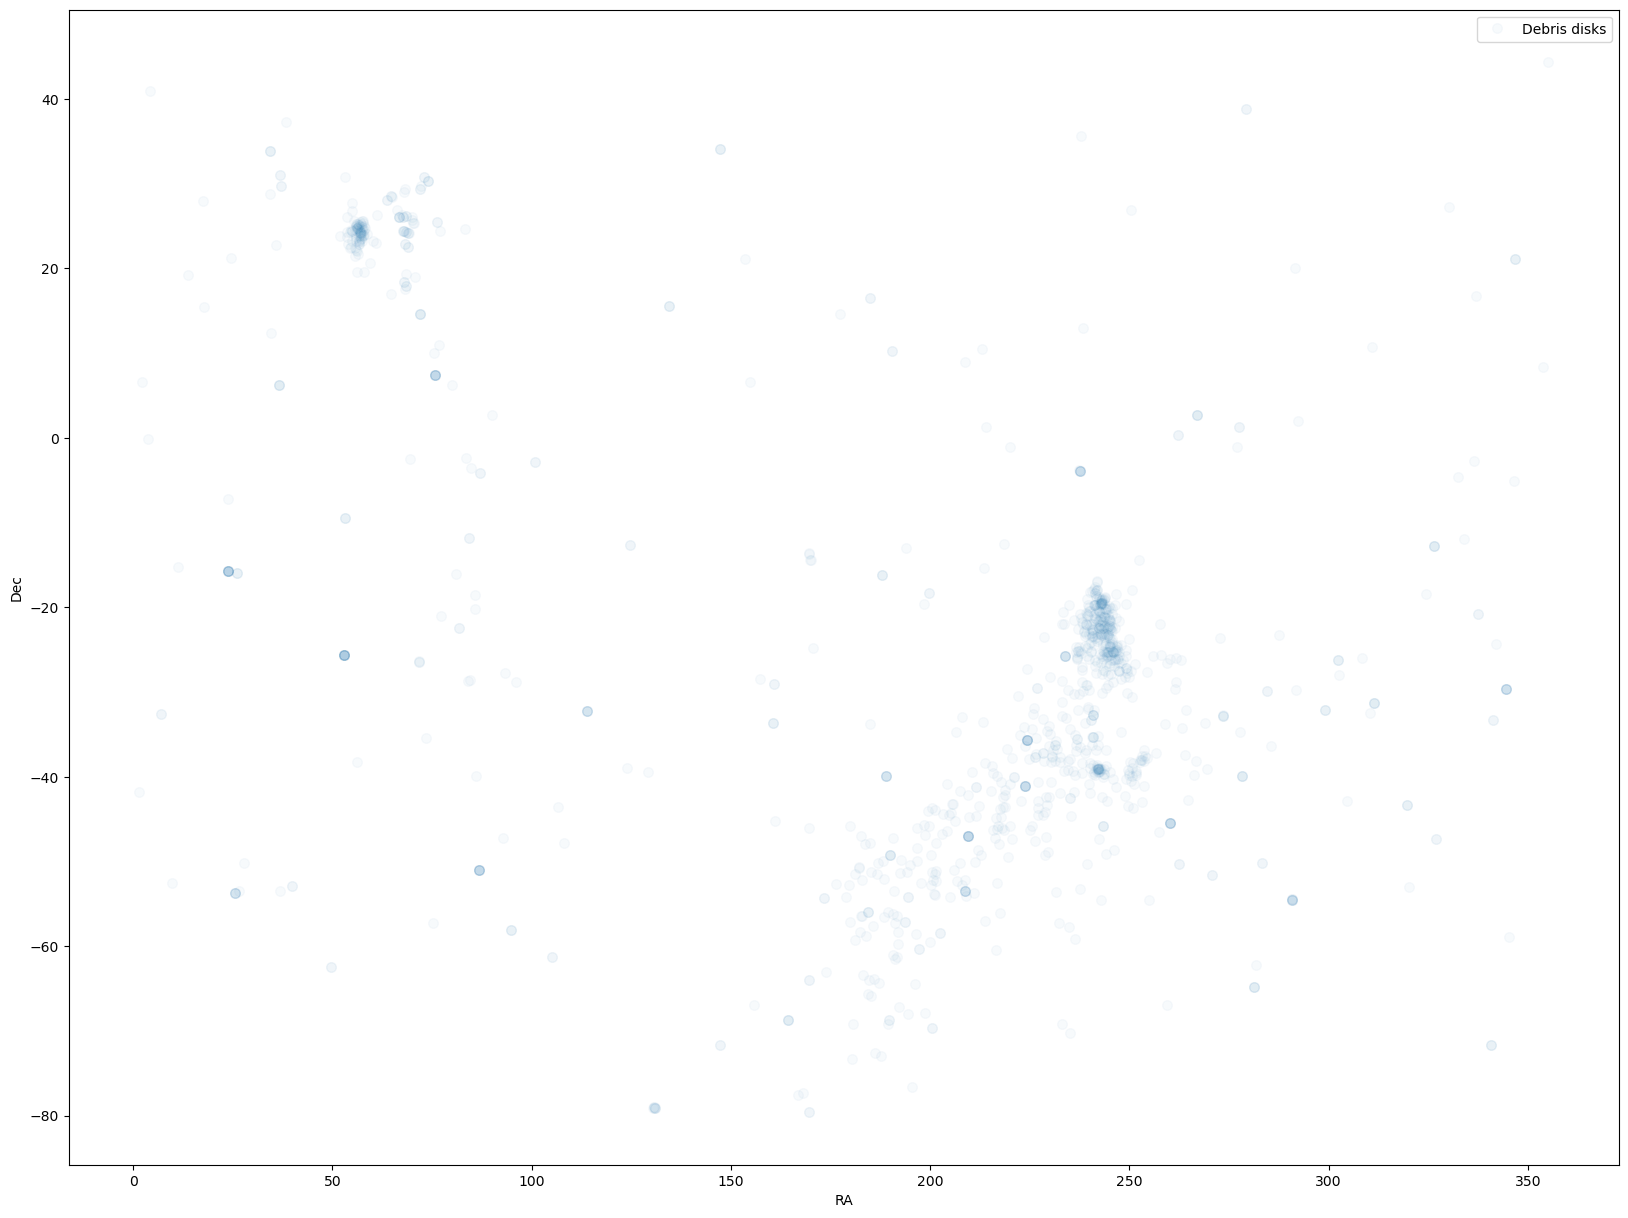

In [15]:
plt.rcParams["figure.figsize"] = (20,15)
output_dd_cube.plot(x='s_ra',y='s_dec', linestyle='', ms=7, marker='o', alpha=0.03, label='Debris disks')
plt.xlabel('RA')
plt.ylabel('Dec')

In [13]:
_, idx = np.unique(output_dd_image["target_name"], return_index=True)
alma_unique = output_dd_image.iloc[idx]

In [14]:
print(len(output_dd_image), "rows before")
print(len(alma_unique), "unique targets after")

936 rows before
779 unique targets after


In [16]:
alma_unique.to_csv(
    "alma_debris_disks_unique_targets.csv",
    index=False
)